Init + import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix , classification_report
import seaborn as sns
import numpy as np

df = pd.read_csv('../../Data/Cleaned/cardio_train_clean.csv')
df.head()

,id,Age,Genre,Taille,Poids,TensionSystolique,TensionArtérielle,Cholesterol,Glucose,Fumeur,Alcool,Actif,Maladie_Cardiaque
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.describe()

,id,Age,Genre,Taille,Poids,TensionSystolique,TensionArtérielle,Cholesterol,Glucose,Fumeur,Alcool,Actif,Maladie_Cardiaque
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.803257,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.762462,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


entrainement du model pour l'arbre de décision 

In [2]:

X = df[['Age', 'Genre', 'Poids', 'TensionSystolique', 'Cholesterol', 'Actif']].values

y= df['Maladie_Cardiaque']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model.fit(X,y)

DecisionTreeClassifier(max_depth=8, random_state=0)

évaluation des performance

Accuracy: 0.7368571428571429
Matrice de confusion:
 [[5454 1615]
 [2069 4862]]
classification_report :
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      7069
           1       0.75      0.70      0.73      6931

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



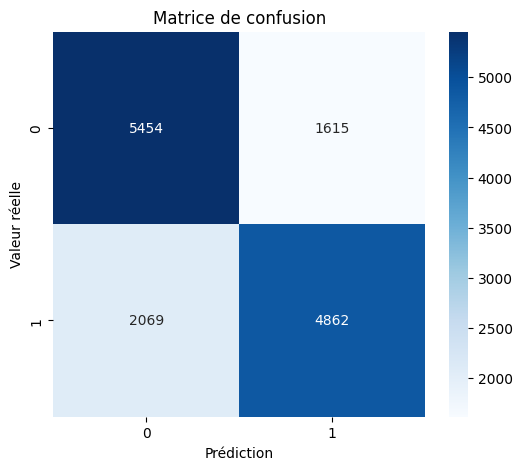

In [3]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Valeur réelle")
plt.show()

In [4]:
# Prédire les probabilités
arthur = [53,2,85,df['TensionSystolique'].mean(),2,1]
y_pred = model.predict([arthur])
y_pred_prob = model.predict_proba([arthur])
print(f"prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : " + str(y_pred))
print(f"probabilité de la prédiction : " + str(y_pred_prob[0][1]))


prédiction pour arthur (0 = pas de risque cardio vasculaire ,1= risque cardio vasculaire) : [0]
probabilité de la prédiction : 0.2


Pour l'arbre de décision on voit que l'algorithme pense qu'Arthur ne subira pas de risque cardio vasculaire avec une probabilité de 50% ( c'est a dire que le modele n'arrive pas trop a savoir )

In [5]:
# Modèle 1 : Régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)[:, 1]

# Modèle 2 : Arbre de décision
tree = DecisionTreeClassifier(max_depth=8, random_state=1)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

# Évaluation
print("RÉGRESSION LOGISTIQUE")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("AUC :", roc_auc_score(y_test, y_proba_log))
print("Rapport de classification :\n", classification_report(y_test, y_pred_log))

print("\nARBRE DE DÉCISION")
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("AUC :", roc_auc_score(y_test, y_proba_tree))
print("Rapport de classification :\n", classification_report(y_test, y_pred_tree))


RÉGRESSION LOGISTIQUE
Accuracy : 0.7207857142857143
AUC : 0.7834168642385845
Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.77      0.74      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000


ARBRE DE DÉCISION
Accuracy : 0.7303571428571428
AUC : 0.7898060054365691
Rapport de classification :
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      7069
           1       0.75      0.68      0.71      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



On voit que l'arbre de décision est meilleur que la regression logistique en tout point 